[(65, 1), (84, 1), (88, 23), (99, 95), (92, 97), (1, 81), (9, 7), (55, 2)]


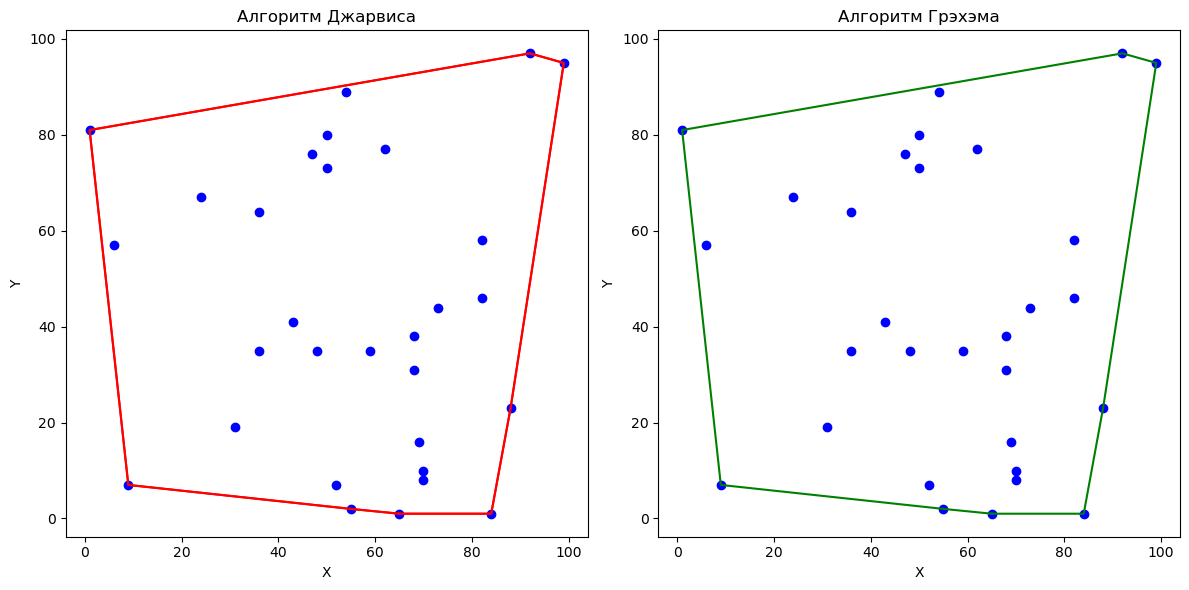

In [42]:
import math
import matplotlib.pyplot as plt
import random
from functools import cmp_to_key


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def cross(self, other):
        return self.x * other.y - self.y * other.x

    def distance(self, other):
        return math.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)

    def __repr__(self):
        return f"({self.x}, {self.y})"

    def __hash__(self):
        return hash((self.x, self.y))


def jarvis(points):
    if len(points) <= 1:
        return points

    p0 = min(points, key=lambda p: (p.y, p.x))
    hull = [p0]
    points_set = set(points)
    while True:
        t = None
        for p in points_set:
            t = p
            break
        last_added = hull[-1]
        for p in points_set:

            cross = (p - last_added).cross(t - last_added)
            if cross > 0 or (cross == 0 and
                             (p - last_added).x ** 2 + (p - last_added).y ** 2 > (t - last_added).x ** 2 + (
                                     t - last_added).y ** 2):
                t = p

        if t == hull[0]:
            break
        hull.append(t)
        points_set.remove(t)

    return hull


def graham(points):
    if len(points) <= 3:
        return points

    p0 = min(points, key=lambda p: (p.y, p.x))

    # Функция для сравнения углов
    def compare(a, b):
        v1 = a - p0
        v2 = b - p0
        cross = v1.cross(v2)

        if cross == 0:
            # Если точки на одной прямой, выбираем ближнюю
            return (v1.x ** 2 + v1.y ** 2) - (v2.x ** 2 + v2.y ** 2)
        return -1 if cross > 0 else 1

    sorted_points = sorted([p for p in points if p != p0], key=cmp_to_key(compare))
    hull = [p0]
    for p in sorted_points:
        while len(hull) >= 2:
            new_vec = p - hull[-1]
            last_vec = hull[-1] - hull[-2]
            cross = new_vec.cross(last_vec)
            if cross > 0 or (cross == 0 and (new_vec.x ** 2 + new_vec.y ** 2) < (last_vec.x ** 2 + last_vec.y ** 2)):
                hull.pop()
            else:
                break
        hull.append(p)

    return hull


# Функция для сравнения, так как в Python 3 нет cmp в sorted

# Генерация случайных точек
# random.seed(42)
points = [Point(random.randint(0, 100), random.randint(0, 100)) for _ in range(30)]

# Удаление дубликатов
unique_points = []
seen = set()
for p in points:
    if (p.x, p.y) not in seen:
        seen.add((p.x, p.y))
        unique_points.append(p)
points = unique_points

# Вычисление выпуклых оболочек
jarvis_hull = jarvis(points)
graham_hull = graham(points)

# Визуализация
plt.figure(figsize=(12, 6))

# Алгоритм Джарвиса
plt.subplot(1, 2, 1)
x = [p.x for p in points]
y = [p.y for p in points]
plt.scatter(x, y, color='blue', label='Точки')

hull_x = [p.x for p in jarvis_hull] + [jarvis_hull[0].x]
hull_y = [p.y for p in jarvis_hull] + [jarvis_hull[0].y]
plt.plot(hull_x, hull_y, 'r-', label='Выпуклая оболочка')
hull_x = [p.x for p in jarvis_hull] + [jarvis_hull[0].x]
hull_y = [p.y for p in jarvis_hull] + [jarvis_hull[0].y]
plt.plot(hull_x, hull_y, 'r-', )

plt.title('Алгоритм Джарвиса')
plt.xlabel('X')
plt.ylabel('Y')

# Алгоритм Грэхэма
plt.subplot(1, 2, 2)
x = [p.x for p in points]
y = [p.y for p in points]
plt.scatter(x, y, color='blue', label='Точки')

hull_x = [p.x for p in graham_hull] + [graham_hull[0].x]
hull_y = [p.y for p in graham_hull] + [graham_hull[0].y]
plt.plot(hull_x, hull_y, 'g-', )
print(graham_hull)
plt.title('Алгоритм Грэхэма')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

In [44]:
def calculate_perimeter(hull):
    perimeter = 0.0
    n = len(hull)
    for i in range(n):
        perimeter += hull[i].distance(hull[(i + 1) % n])
    return perimeter


def calculate_area(hull):
    area = 0.0
    n = len(hull)
    for i in range(n):
        x_i, y_i = hull[i].x, hull[i].y
        x_j, y_j = hull[(i + 1) % n].x, hull[(i + 1) % n].y
        area += (x_i * y_j) - (x_j * y_i)
    return abs(area) / 2


jarvis_perimeter = calculate_perimeter(jarvis_hull)
jarvis_area = calculate_area(jarvis_hull)

graham_perimeter = calculate_perimeter(graham_hull)
graham_area = calculate_area(graham_hull)
# Вывод результатов в консоль
print("Результаты алгоритма Джарвиса:")
print(f"Периметр выпуклой оболочки: {jarvis_perimeter:.2f}")
print(f"Площадь выпуклой оболочки: {jarvis_area:.2f}\n")

print("Результаты алгоритма Грэхэма:")
print(f"Периметр выпуклой оболочки: {graham_perimeter:.2f}")
print(f"Площадь выпуклой оболочки: {graham_area:.2f}")

Результаты алгоритма Джарвиса:
Периметр выпуклой оболочки: 344.62
Площадь выпуклой оболочки: 7481.00

Результаты алгоритма Грэхэма:
Периметр выпуклой оболочки: 344.62
Площадь выпуклой оболочки: 7481.00
